In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math

In [3]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

## Spectrum Analysis: Weak (Linear) Landau Damping 

In [4]:
# number of Hermite moments
Nv = 300

In [5]:
def factorial_ratio(n, m):
    if n >= m:
        return math.prod(range(m + 1, n + 1))
    else:
        return 1 / math.prod(range(n + 1, m + 1))

In [6]:
def A_advection(Nv, k):
    # advection matrix with off-diagonal entries
    # intialize off-diagonal vector
    vec = np.zeros(Nv-1, dtype="complex128")
    for jj in range(1, Nv):
        vec[jj-1] = np.sqrt(jj)
    # set up tri-diagonal matrix
    A = np.diag(vec, 1) + np.diag(vec, -1) 
    # wave-particle interaction term
    A[1, 0] += 1 / k**2 
    return A

def damping_rate(mat):
    # return least damped mode (gamma) s.t. lambda = gamma + i * omega
    # eigenvalue decomposition
    eig, _= np.linalg.eig(mat)
    # return the least damped mode rate
    if np.max(eig.real) <= 0:
        return np.max(eig.real)
    else:
        print("we have an instability", np.max(eig.real))
    
def LenardBernstein_eig(k, nu, Nv):
    # Lenard-Bernstein operator 
    A = A_advection(Nv=Nv, k=k) + np.diag(np.arange(Nv)*nu/(1j*k), 0)
    return damping_rate(mat=-1j * k * A)

def ConservativeLenardBernstein_eig(k, nu, Nv):
    # Lenard-Bernstein operator 
    main_diag = np.arange(Nv)-2
    main_diag[0] = 0 
    main_diag[1] = 0 
    main_diag[2] = 0 
    A = A_advection(Nv=Nv, k=k) + np.diag(main_diag*nu/(1j*k), 0)
    return damping_rate(mat=-1j * k * A)
    
def Hypercollisions_eig(k, nu, Nv, alpha=3):
    # Hypercollisional operator 
    A = A_advection(Nv=Nv, k=k)
    # advection matrix (main-diagonal)
    vec2 = np.zeros(Nv)
    for jj in range(alpha, Nv):
        # hyper collisions coefficient
        vec2[jj] = np.power(-1, alpha+1) * factorial_ratio(n=jj, m=jj-alpha) * factorial_ratio(n=Nv - 1 - alpha, m=Nv -1)
    A =  A + np.diag(nu*vec2 / (1j*k), 0)
    return damping_rate(mat=-1j * k * A)

def HammetPerkins_eig(k, nu, Nv):
    # Hammet Perkins esque (like) operator 
    # C(C_{Nv-1}) = i * nu * k/|k| * C_{Nv-1}
    A = A_advection(Nv=Nv, k=k)
    A[-1, -1] = - nu * 1j * np.sqrt(Nv) * k / np.abs(k) 
    return damping_rate(mat=-1j * k * A)

0.9122448979591836
0.9122448979591836


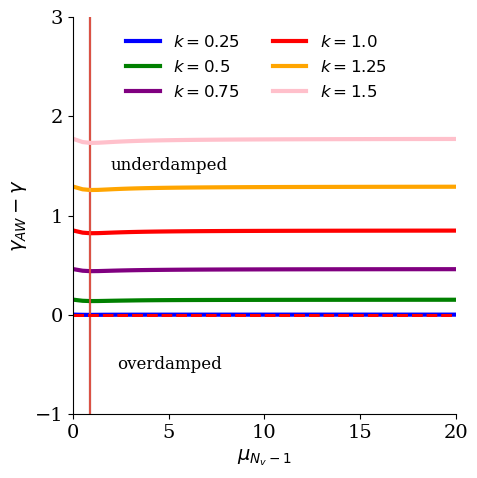

In [7]:
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))

# vector of possible closure parameters 
nu_LC = np.linspace(1E-1, 20, 50)

eig_LC = np.zeros(len(nu_LC))
for ii, nu in enumerate(nu_LC):
    eig_LC[ii] = HammetPerkins_eig(k=0.25, nu=nu, Nv=Nv) 
#ax.axvline(nu_LC[np.argmin(np.abs(eig_LC + 0.00216))], color="blue", alpha=0.6)
ax.plot(nu_LC, eig_LC + 0.00216, color="blue", label="$k=0.25$", linewidth=3)

eig_LC = np.zeros(len(nu_LC))
for ii, nu in enumerate(nu_LC):
    eig_LC[ii] = HammetPerkins_eig(k=0.5, nu=nu, Nv=Nv)
ax.axvline(nu_LC[np.argmin(np.abs(eig_LC + 0.1533))], color="green", alpha=0.6)
print(nu_LC[np.argmin(np.abs(eig_LC + 0.1533))])
ax.plot(nu_LC, eig_LC + 0.1533, color="green", label="$k=0.5$", linewidth=3)

eig_LC = np.zeros(len(nu_LC))
for ii, nu in enumerate(nu_LC):
    eig_LC[ii] = HammetPerkins_eig(k=0.75, nu=nu, Nv=Nv) 
ax.axvline(nu_LC[np.argmin(np.abs(eig_LC + 0.461918))], color="purple", alpha=0.6)
ax.plot(nu_LC, eig_LC + 0.461918, color="purple", label="$k=0.75$", linewidth=3)

eig_LC = np.zeros(len(nu_LC))
for ii, nu in enumerate(nu_LC):
    eig_LC[ii] = HammetPerkins_eig(k=1, nu=nu, Nv=Nv) 
ax.axvline(nu_LC[np.argmin(np.abs(eig_LC + 0.8513))], color="red", alpha=0.6)
ax.plot(nu_LC, eig_LC + 0.8513, color="red", label=r"$k=1.0$", linewidth=3)
ax.axhline(0, ls="--", color="red", linewidth=2)

eig_LC = np.zeros(len(nu_LC))
for ii, nu in enumerate(nu_LC):
    eig_LC[ii] = HammetPerkins_eig(k=1.25, nu=nu, Nv=Nv) 
ax.axvline(nu_LC[np.argmin(np.abs(eig_LC + 1.29386))], color="orange", alpha=0.2)
ax.plot(nu_LC, eig_LC + 1.29386, color="orange", label=r"$k=1.25$", linewidth=3)
ax.axhline(0, ls="--", color="red", linewidth=2)

eig_LC = np.zeros(len(nu_LC))
for ii, nu in enumerate(nu_LC):
    eig_LC[ii] = HammetPerkins_eig(k=1.5, nu=nu, Nv=Nv) 
ax.axvline(nu_LC[np.argmin(np.abs(eig_LC + 1.7757))], color="pink", alpha=0.2)
print(nu_LC[np.argmin(np.abs(eig_LC + 1.7757))])
ax.plot(nu_LC, eig_LC + 1.7757, color="pink", label=r"$k=1.5$", linewidth=3)
ax.axhline(0, ls="--", color="red", linewidth=2)


ax.set_xlabel(r"$\mu_{N_{v}-1}$")
ax.set_ylabel(r"$\gamma_{AW} - \gamma$")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(-1, 3)
ax.set_yticks([-1, 0, 1, 2, 3])
ax.set_xlim(0, np.max(nu_LC))
legend = ax.legend(ncols=2, fancybox=False, shadow=False, fontsize=12,  bbox_to_anchor=(0.1, 0.75))
legend.get_frame().set_alpha(0)
ax.text(np.mean(nu_LC)/2, 1.5, 'underdamped', fontsize=12, ha='center', va='center')
ax.text(np.mean(nu_LC)/2, -0.5, 'overdamped', fontsize=12, ha='center', va='center')
plt.tight_layout()

plt.savefig("figs/spectra/optimal_HammetPerkins_nu_postive_k_Nv_" + str(Nv) + ".png", dpi=200, bbox_inches='tight')

1.5245454545454542
13.640909090909089


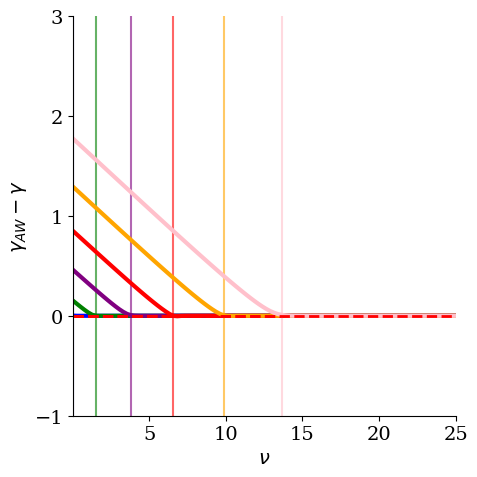

In [8]:
alpha=3
nu_HP = np.linspace(0.01, 25, 100)

fig, ax = plt.subplots(ncols=1, figsize=(5, 5))

eig_LB = np.zeros(len(nu_HP))
for ii, nu in enumerate(nu_HP):
    eig_LB[ii] = Hypercollisions_eig(k=0.25, nu=nu, Nv=Nv, alpha=alpha) 
ax.axvline(nu_HP[np.min(np.where(np.abs(eig_LB + 0.00216) < 1e-2))], color="blue", alpha=0.6)
ax.plot(nu_HP, eig_LB + 0.00216, color="blue", linewidth=3)

eig_LB = np.zeros(len(nu_HP))
for ii, nu in enumerate(nu_HP):
    eig_LB[ii] = Hypercollisions_eig(k=0.5, nu=nu, Nv=Nv, alpha=alpha) 
ax.axvline(nu_HP[np.min(np.where(np.abs(eig_LB + 0.1533) < 1e-2))], color="green", alpha=0.6)
print(nu_HP[np.min(np.where(np.abs(eig_LB + 0.1533) < 1e-2))])
ax.plot(nu_HP, eig_LB + 0.1533, color="green", linewidth=3)

eig_LB = np.zeros(len(nu_HP))
for ii, nu in enumerate(nu_HP):
    eig_LB[ii] = Hypercollisions_eig(k=0.75, nu=nu, Nv=Nv, alpha=alpha) 
ax.axvline(nu_HP[np.min(np.where(np.abs(eig_LB + 0.461918) < 1e-2))], color="purple", alpha=0.6)
ax.plot(nu_HP, eig_LB + 0.461918, color="purple",  linewidth=3)

eig_LB = np.zeros(len(nu_HP))
for ii, nu in enumerate(nu_HP):
    eig_LB[ii] = Hypercollisions_eig(k=1, nu=nu, Nv=Nv, alpha=alpha) 
ax.axvline(nu_HP[np.min(np.where(np.abs(eig_LB + 0.8513) < 1e-2))], color="red", alpha=0.6)
ax.plot(nu_HP, eig_LB + 0.8513, color="red", linewidth=3)
ax.axhline(0, ls="--", color="red", linewidth=2)

eig_LB = np.zeros(len(nu_HP))
for ii, nu in enumerate(nu_HP):
    eig_LB[ii] = Hypercollisions_eig(k=1.25, nu=nu, Nv=Nv, alpha=alpha) 
ax.axvline(nu_HP[np.min(np.where(np.abs(eig_LB + 1.29386) < 1e-2))], color="orange", alpha=0.6)
ax.plot(nu_HP, eig_LB + 1.29386, color="orange",linewidth=3)
ax.axhline(0, ls="--", color="red", linewidth=2)

eig_LB = np.zeros(len(nu_HP))
for ii, nu in enumerate(nu_HP):
    eig_LB[ii] = Hypercollisions_eig(k=1.5, nu=nu, Nv=Nv, alpha=alpha) 
ax.axvline(nu_HP[np.min(np.where(np.abs(eig_LB + 1.7757) < 1e-2))], color="pink", alpha=0.6)
print(nu_HP[np.min(np.where(np.abs(eig_LB + 1.7757) < 1e-2))])
ax.plot(nu_HP, eig_LB + 1.7757, color="pink", linewidth=3)
ax.axhline(0, ls="--", color="red", linewidth=2)

ax.set_xlabel(r"$\nu$")
ax.set_yticks([-1, 0, 1, 2, 3])
ax.set_ylabel(r"$\gamma_{AW} - \gamma $")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(-1, 3)

ax.set_xlim(np.min(nu_HP), np.max(nu_HP))
#legend = ax.legend(ncols=2, fancybox=False, shadow=False, fontsize=12,  bbox_to_anchor=(0.1, 1.))
#legend.get_frame().set_alpha(0)

plt.tight_layout()

plt.savefig("figs/spectra/optimal_Hypercollisions" + str(alpha) + "_nu_positive_k_Nv_" + str(Nv) + ".png", dpi=200, bbox_inches='tight')

2.029393939393939
22.980606060606057


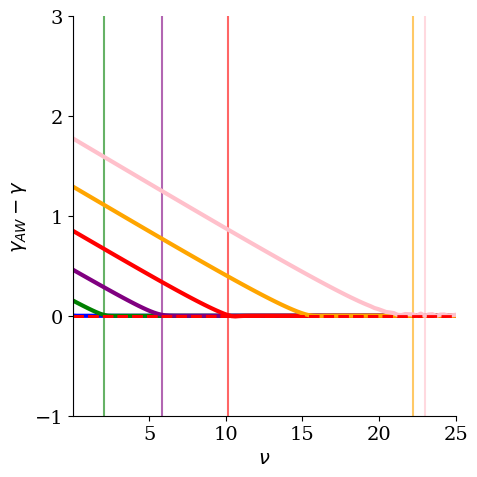

In [10]:
alpha=5
nu_HP = np.linspace(0.01, 25, 100)

fig, ax = plt.subplots(ncols=1, figsize=(5, 5))

eig_LB = np.zeros(len(nu_HP))
for ii, nu in enumerate(nu_HP):
    eig_LB[ii] = Hypercollisions_eig(k=0.25, nu=nu, Nv=Nv, alpha=alpha) 
ax.axvline(nu_HP[np.min(np.where(np.abs(eig_LB + 0.00216) < 1e-2))], color="blue", alpha=0.6)
ax.plot(nu_HP, eig_LB + 0.00216, color="blue", linewidth=3)

eig_LB = np.zeros(len(nu_HP))
for ii, nu in enumerate(nu_HP):
    eig_LB[ii] = Hypercollisions_eig(k=0.5, nu=nu, Nv=Nv, alpha=alpha) 
ax.axvline(nu_HP[np.min(np.where(np.abs(eig_LB + 0.1533) < 1e-2))], color="green", alpha=0.6)
print(nu_HP[np.min(np.where(np.abs(eig_LB + 0.1533) < 1e-2))])
ax.plot(nu_HP, eig_LB + 0.1533, color="green", linewidth=3)

eig_LB = np.zeros(len(nu_HP))
for ii, nu in enumerate(nu_HP):
    eig_LB[ii] = Hypercollisions_eig(k=0.75, nu=nu, Nv=Nv, alpha=alpha) 
ax.axvline(nu_HP[np.min(np.where(np.abs(eig_LB + 0.461918) < 1e-2))], color="purple", alpha=0.6)
ax.plot(nu_HP, eig_LB + 0.461918, color="purple",  linewidth=3)

eig_LB = np.zeros(len(nu_HP))
for ii, nu in enumerate(nu_HP):
    eig_LB[ii] = Hypercollisions_eig(k=1, nu=nu, Nv=Nv, alpha=alpha) 
ax.axvline(nu_HP[np.min(np.where(np.abs(eig_LB + 0.8513) < 1e-2))], color="red", alpha=0.6)
ax.plot(nu_HP, eig_LB + 0.8513, color="red", linewidth=3)
ax.axhline(0, ls="--", color="red", linewidth=2)

eig_LB = np.zeros(len(nu_HP))
for ii, nu in enumerate(nu_HP):
    eig_LB[ii] = Hypercollisions_eig(k=1.25, nu=nu, Nv=Nv, alpha=alpha) 
ax.axvline(nu_HP[np.argmin(np.abs(eig_LB + 1.29386))], color="orange", alpha=0.6)
ax.plot(nu_HP, eig_LB + 1.29386, color="orange",linewidth=3)
ax.axhline(0, ls="--", color="red", linewidth=2)

eig_LB = np.zeros(len(nu_HP))
for ii, nu in enumerate(nu_HP):
    eig_LB[ii] = Hypercollisions_eig(k=1.5, nu=nu, Nv=Nv, alpha=alpha) 
ax.axvline(nu_HP[np.argmin(np.abs(eig_LB + 1.7757))], color="pink", alpha=0.6)
print(nu_HP[np.argmin(np.abs(eig_LB + 1.7757))])
ax.plot(nu_HP, eig_LB + 1.7757, color="pink", linewidth=3)
ax.axhline(0, ls="--", color="red", linewidth=2)

ax.set_xlabel(r"$\nu$")
ax.set_yticks([-1, 0, 1, 2, 3])
ax.set_ylabel(r"$\gamma_{AW} - \gamma $")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(-1, 3)

ax.set_xlim(np.min(nu_HP), np.max(nu_HP))
#legend = ax.legend(ncols=2, fancybox=False, shadow=False, fontsize=12,  bbox_to_anchor=(0.1, 1.))
#legend.get_frame().set_alpha(0)

plt.tight_layout()


plt.savefig("figs/spectra/optimal_Hypercollisions" + str(alpha) + "_nu_positive_k_Nv_" + str(Nv) + ".png", dpi=200, bbox_inches='tight')

2.786666666666666
25.0


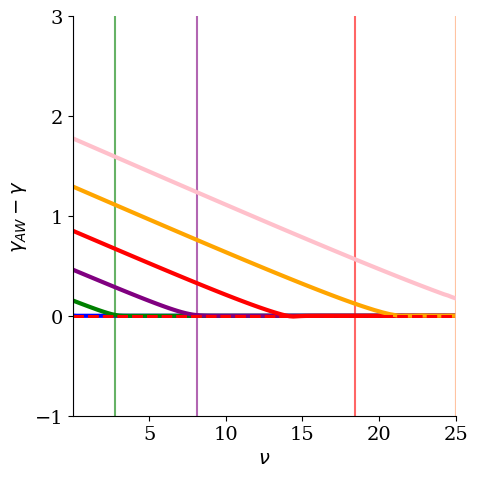

In [11]:
alpha=7
nu_HP = np.linspace(0.01, 25, 100)

fig, ax = plt.subplots(ncols=1, figsize=(5, 5))

eig_LB = np.zeros(len(nu_HP))
for ii, nu in enumerate(nu_HP):
    eig_LB[ii] = Hypercollisions_eig(k=0.25, nu=nu, Nv=Nv, alpha=alpha) 
ax.axvline(nu_HP[np.min(np.where(np.abs(eig_LB + 0.00216) < 1e-2))], color="blue", alpha=0.6)
ax.plot(nu_HP, eig_LB + 0.00216, color="blue", linewidth=3)

eig_LB = np.zeros(len(nu_HP))
for ii, nu in enumerate(nu_HP):
    eig_LB[ii] = Hypercollisions_eig(k=0.5, nu=nu, Nv=Nv, alpha=alpha) 
ax.axvline(nu_HP[np.min(np.where(np.abs(eig_LB + 0.1533) < 1e-2))], color="green", alpha=0.6)
print(nu_HP[np.min(np.where(np.abs(eig_LB + 0.1533) < 1e-2))])
ax.plot(nu_HP, eig_LB + 0.1533, color="green", linewidth=3)

eig_LB = np.zeros(len(nu_HP))
for ii, nu in enumerate(nu_HP):
    eig_LB[ii] = Hypercollisions_eig(k=0.75, nu=nu, Nv=Nv, alpha=alpha) 
ax.axvline(nu_HP[np.min(np.where(np.abs(eig_LB + 0.461918) < 1e-2))], color="purple", alpha=0.6)
ax.plot(nu_HP, eig_LB + 0.461918, color="purple",  linewidth=3)

eig_LB = np.zeros(len(nu_HP))
for ii, nu in enumerate(nu_HP):
    eig_LB[ii] = Hypercollisions_eig(k=1, nu=nu, Nv=Nv, alpha=alpha) 
ax.axvline(nu_HP[np.argmin(np.abs(eig_LB + 0.8513))], color="red", alpha=0.6)
ax.plot(nu_HP, eig_LB + 0.8513, color="red", linewidth=3)
ax.axhline(0, ls="--", color="red", linewidth=2)

eig_LB = np.zeros(len(nu_HP))
for ii, nu in enumerate(nu_HP):
    eig_LB[ii] = Hypercollisions_eig(k=1.25, nu=nu, Nv=Nv, alpha=alpha) 
ax.axvline(nu_HP[np.argmin(np.abs(eig_LB + 1.29386))], color="orange", alpha=0.6)
ax.plot(nu_HP, eig_LB + 1.29386, color="orange",linewidth=3)
ax.axhline(0, ls="--", color="red", linewidth=2)

eig_LB = np.zeros(len(nu_HP))
for ii, nu in enumerate(nu_HP):
    eig_LB[ii] = Hypercollisions_eig(k=1.5, nu=nu, Nv=Nv, alpha=alpha) 
ax.axvline(nu_HP[np.argmin(np.abs(eig_LB + 1.7757))], color="pink", alpha=0.6)
print(nu_HP[np.argmin(np.abs(eig_LB + 1.7757))])
ax.plot(nu_HP, eig_LB + 1.7757, color="pink", linewidth=3)
ax.axhline(0, ls="--", color="red", linewidth=2)

ax.set_xlabel(r"$\nu$")
ax.set_yticks([-1, 0, 1, 2, 3])
ax.set_ylabel(r"$\gamma_{AW} - \gamma $")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(-1, 3)

ax.set_xlim(np.min(nu_HP), np.max(nu_HP))
#legend = ax.legend(ncols=2, fancybox=False, shadow=False, fontsize=12,  bbox_to_anchor=(0.1, 1.))
#legend.get_frame().set_alpha(0)

plt.tight_layout()


plt.savefig("figs/spectra/optimal_Hypercollisions" + str(alpha) + "_nu_positive_k_Nv_" + str(Nv) + ".png", dpi=200, bbox_inches='tight')

0.017480044847479493
0.8258799387844268


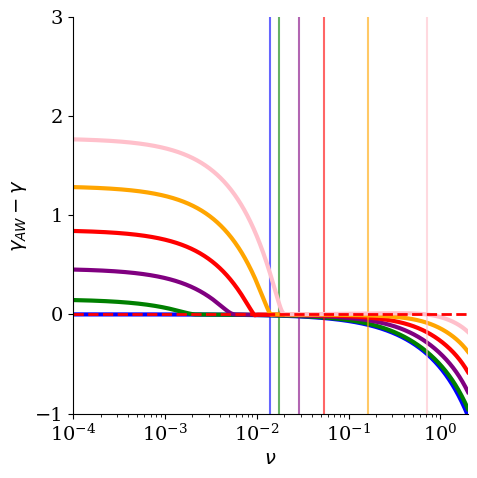

In [12]:
nu_LB = 10**np.linspace(0.3, -4, 1000)

fig, ax = plt.subplots(ncols=1, figsize=(5, 5))

eig_LB = np.zeros(len(nu_LB))
for ii, nu in enumerate(nu_LB):
    eig_LB[ii] = LenardBernstein_eig(k=0.25, nu=nu, Nv=Nv) 
ax.axvline(nu_LB[np.min(np.where(np.abs(eig_LB +  0.00216) < 1e-2))], color="blue", alpha=0.6)
ax.plot(nu_LB, eig_LB + 0.00216, color="blue", label="$k=0.4$", linewidth=3)

eig_LB = np.zeros(len(nu_LB))
for ii, nu in enumerate(nu_LB):
    eig_LB[ii] = LenardBernstein_eig(k=0.5, nu=nu, Nv=Nv) 
ax.axvline(nu_LB[np.min(np.where(np.abs(eig_LB +  0.1533) < 1e-2))], color="green", alpha=0.6)
print(nu_LB[np.min(np.where(np.abs(eig_LB + 0.1533) < 1e-2))])
ax.plot(nu_LB, eig_LB + 0.1533, color="green", label="$k=0.6$", linewidth=3)

eig_LB = np.zeros(len(nu_LB))
for ii, nu in enumerate(nu_LB):
    eig_LB[ii] = LenardBernstein_eig(k=0.75, nu=nu, Nv=Nv) 
ax.axvline(nu_LB[np.min(np.where(np.abs(eig_LB +  0.461918) < 1e-2))], color="purple", alpha=0.6)
ax.plot(nu_LB, eig_LB + 0.461918, color="purple", label="$k=0.8$", linewidth=3)

eig_LB = np.zeros(len(nu_LB))
for ii, nu in enumerate(nu_LB):
    eig_LB[ii] = LenardBernstein_eig(k=1, nu=nu, Nv=Nv) 
ax.axvline(nu_LB[np.min(np.where(np.abs(eig_LB + 0.8513) < 1e-2))], color="red", alpha=0.6)
ax.plot(nu_LB, eig_LB + 0.8513, color="red", label="$k=1.0$", linewidth=3)

eig_LB = np.zeros(len(nu_LB))
for ii, nu in enumerate(nu_LB):
    eig_LB[ii] = LenardBernstein_eig(k=1.25, nu=nu, Nv=Nv) 
ax.axvline(nu_LB[np.min(np.where(np.abs(eig_LB +  1.29386) < 1e-2))], color="orange", alpha=0.6)
ax.plot(nu_LB, eig_LB + 1.29386, color="orange", label="$k=1.2$", linewidth=3)

eig_LB = np.zeros(len(nu_LB))
for ii, nu in enumerate(nu_LB):
    eig_LB[ii] = LenardBernstein_eig(k=1.5, nu=nu, Nv=Nv) 
ax.axvline(nu_LB[np.min(np.where(np.abs(eig_LB +  1.7757) < 1e-3))], color="pink", alpha=0.6)
print(nu_LB[np.min(np.where(np.abs(eig_LB +  1.7757) < 1e-2))])
ax.plot(nu_LB, eig_LB + 1.7757, color="pink", label="$k=1.5$", linewidth=3)

ax.axhline(0, ls="--", color="red", linewidth=2)
ax.set_xlabel(r"$\nu$")
ax.set_xscale("log")
ax.set_ylabel(r"$\gamma_{AW} - \gamma$")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(-1, 3)
ax.set_yticks([-1, 0, 1, 2, 3])
# legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='upper right')
# legend.get_frame().set_alpha(0)
ax.set_xlim(np.min(nu_LB), np.max(nu_LB))
# ax.text(1e-1*np.mean(nu_LB), 1.5, 'underdamped', fontsize=12, ha='center', va='center')
# ax.text(1e-1*np.mean(nu_LB), -0.5, 'overdamped', fontsize=12, ha='center', va='center')

plt.tight_layout()
plt.savefig("figs/spectra/optimal_LenardBernstein_nu_positive_k_Nv_" + str(Nv) + ".png", dpi=200)